A link to the dataset on Kaggle  
https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("data/movies_metadata.csv")

/var/folders/nb/9rv0k2zs65xfgzvd88cpv_8m0000gp/T/ipykernel_1364/1471465470.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/movies_metadata.csv")


# Cleaning Movies Metadata Dataset

In [3]:
from ast import literal_eval

In [4]:
def json_to_arr(cell, wanted = "name"):  
    cell_2 = literal_eval(cell) 
    if cell_2 == [] or (isinstance(cell_2, float) and cell_2.isna()) or cell_2 == np.nan: 
        return np.nan 
    
    result = [] 
    for element in cell_2:
        result.append(element[wanted]) 
        
    return result

In [5]:
df["id"]

0           862
1          8844
2         15602
3         31357
4         11862
          ...  
45461    439050
45462    111109
45463     67758
45464    227506
45465    461257
Name: id, Length: 45466, dtype: object

In [6]:
convertible_ids = []
incorrect_ids   = []
for movie_id in df["id"]:
    try:
        convertible_ids.append(int(movie_id))
    except:
        incorrect_ids.append(movie_id)
        
print(incorrect_ids)

['1997-08-20', '2012-09-29', '2014-01-01']


In [7]:
len(list(set(convertible_ids)))

45433

In [8]:
wrong_indexes = []
for wrong_id in incorrect_ids:
    wrong_indexes.append(df[df["id"] == wrong_id].index[0])
    
wrong_indexes

[19730, 29503, 35587]

In [9]:
df.shape

(45466, 24)

In [10]:
df.drop(index=wrong_indexes, axis=0, inplace=True)
df.drop_duplicates(inplace = True)
df

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


In [11]:
df['status'].value_counts()

Released           45002
Rumored              229
Post Production       98
In Production         20
Planned               15
Canceled               2
Name: status, dtype: int64

In [12]:
df['status'].isna().sum() # 84 null values in this column can be imputed with the most occuring value in the column

84

In [13]:
df['status'].fillna(df['status'].mode()[0], inplace=True)

In [14]:
df['video'].value_counts()

False    45354
True        93
Name: video, dtype: int64

In [15]:
# After dropping the rows whose ids could not be converted to integer, we can now convert the entire column to int
df["id"] = df["id"].astype("int32")
df.info()
# Notice the columns 1, 4, and 19: They have way too many null values.
# Also, after observing the above dataframe, we can drop any of these two columns - original_title and title
# Similarly, we can drop the spoken language column as we already have original_language column which is the main language of the film
# We can replace the overview column with the keywords column
# So, we are dropping these three columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45450 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45450 non-null  object 
 1   belongs_to_collection  4491 non-null   object 
 2   budget                 45450 non-null  object 
 3   genres                 45450 non-null  object 
 4   homepage               7777 non-null   object 
 5   id                     45450 non-null  int32  
 6   imdb_id                45433 non-null  object 
 7   original_language      45439 non-null  object 
 8   original_title         45450 non-null  object 
 9   overview               44496 non-null  object 
 10  popularity             45447 non-null  object 
 11  poster_path            45064 non-null  object 
 12  production_companies   45447 non-null  object 
 13  production_countries   45447 non-null  object 
 14  release_date           45363 non-null  object 
 15  re

In [16]:
df['release_year'] = pd.to_datetime(df['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)
df.drop(columns=["release_date"], inplace=True)

In [17]:
# converting the data types

df["budget"] = df["budget"].apply(lambda x: int(x) if x != 0 else np.nan)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45450 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45450 non-null  object 
 1   belongs_to_collection  4491 non-null   object 
 2   budget                 45450 non-null  int64  
 3   genres                 45450 non-null  object 
 4   homepage               7777 non-null   object 
 5   id                     45450 non-null  int32  
 6   imdb_id                45433 non-null  object 
 7   original_language      45439 non-null  object 
 8   original_title         45450 non-null  object 
 9   overview               44496 non-null  object 
 10  popularity             45447 non-null  object 
 11  poster_path            45064 non-null  object 
 12  production_companies   45447 non-null  object 
 13  production_countries   45447 non-null  object 
 14  revenue                45447 non-null  float64
 15  ru

In [18]:
round(df["vote_average"],0).isna().sum()

3

In [19]:
df["vote_average"] = round(df["vote_average"],0)
df["vote_average"]

# could not convert these to int

0        8.0
1        7.0
2        6.0
3        6.0
4        6.0
        ... 
45461    4.0
45462    9.0
45463    4.0
45464    0.0
45465    0.0
Name: vote_average, Length: 45450, dtype: float64

In [20]:
df.drop(columns=["belongs_to_collection", "id", "imdb_id", "homepage", "tagline", "original_title", "overview", "poster_path", "spoken_languages"], inplace=True)
df
# we need to clean these columns now- genres, production_companies, and production_countries

,adult,budget,genres,original_language,popularity,production_companies,production_countries,revenue,runtime,status,title,video,vote_average,vote_count,release_year
0,False,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",en,21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",373554033.0,81.0,Released,Toy Story,False,8.0,5415.0,1995
1,False,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",en,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",262797249.0,104.0,Released,Jumanji,False,7.0,2413.0,1995
2,False,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",en,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",0.0,101.0,Released,Grumpier Old Men,False,6.0,92.0,1995
3,False,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",81452156.0,127.0,Released,Waiting to Exhale,False,6.0,34.0,1995
4,False,0,"[{'id': 35, 'name': 'Comedy'}]",en,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",76578911.0,106.0,Released,Father of the Bride Part II,False,6.0,173.0,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",fa,0.072051,[],"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",0.0,90.0,Released,Subdue,False,4.0,1.0,NaT
45462,False,0,"[{'id': 18, 'name': 'Drama'}]",tl,0.178241,"[{'name': 'Sine Olivia', 'id': 19653}]","[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",0.0,360.0,Released,Century of Birthing,False,9.0,3.0,2011
45463,False,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",en,0.903007,"[{'name': 'American World Pictures', 'id': 6165}]","[{'iso_3166_1': 'US', 'name': 'United States o...",0.0,90.0,Released,Betrayal,False,4.0,6.0,2003
45464,False,0,[],en,0.003503,"[{'name': 'Yermoliev', 'id': 88753}]","[{'iso_3166_1': 'RU', 'name': 'Russia'}]",0.0,87.0,Released,Satan Triumphant,False,0.0,0.0,1917


In [21]:
# Before converting the strings to json objects, we first need to remove the null values
df.dropna(inplace = True)

In [22]:
df["genres"] = df["genres"].apply(lambda x: json_to_arr(x))

In [23]:
df["production_companies"] = df["production_companies"].apply(lambda x: json_to_arr(x))

prod_comp = []
for x in df["production_companies"]:
    try:
        prod_comp.append(x[0])
    except:
        prod_comp.append(np.nan)
        
df["production_companies"] = prod_comp

In [24]:
df["production_countries"] = df["production_countries"].apply(lambda x: json_to_arr(x))

prod_countries = []
for x in df["production_countries"]:
    try:
        prod_countries.append(x[0])
    except:
        prod_countries.append(np.nan)
        
df["production_countries"] = prod_countries

In [35]:
df

,adult,budget,genres,original_language,popularity,production_companies,production_countries,revenue,runtime,status,title,video,vote_average,vote_count,release_year
0,False,30000000.0,"[Animation, Comedy, Family]",en,21.946943,Pixar Animation Studios,United States of America,373554033.0,81.0,Released,Toy Story,False,8.0,5415.0,1995
1,False,65000000.0,"[Adventure, Fantasy, Family]",en,17.015539,TriStar Pictures,United States of America,262797249.0,104.0,Released,Jumanji,False,7.0,2413.0,1995
2,False,NaN,"[Romance, Comedy]",en,11.7129,Warner Bros.,United States of America,NaN,101.0,Released,Grumpier Old Men,False,6.0,92.0,1995
3,False,16000000.0,"[Comedy, Drama, Romance]",en,3.859495,Twentieth Century Fox Film Corporation,United States of America,81452156.0,127.0,Released,Waiting to Exhale,False,6.0,34.0,1995
4,False,NaN,[Comedy],en,8.387519,Sandollar Productions,United States of America,76578911.0,106.0,Released,Father of the Bride Part II,False,6.0,173.0,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,"[Drama, Family]",fa,0.072051,NaN,Iran,NaN,90.0,Released,Subdue,False,4.0,1.0,NaT
45462,False,NaN,[Drama],tl,0.178241,Sine Olivia,Philippines,NaN,360.0,Released,Century of Birthing,False,9.0,3.0,2011
45463,False,NaN,"[Action, Drama, Thriller]",en,0.903007,American World Pictures,United States of America,NaN,90.0,Released,Betrayal,False,4.0,6.0,2003
45464,False,NaN,NaN,en,0.003503,Yermoliev,Russia,NaN,87.0,Released,Satan Triumphant,False,0.0,0.0,1917


In [38]:
" ".join(df["genres"][0])

'Animation Comedy Family'

In [25]:
df.describe()

,budget,revenue,runtime,vote_average,vote_count
count,4.517900e+04,4.517900e+04,45179.000000,45179.000000,45179.000000
mean,4.250658e+06,1.127898e+07,94.134399,5.625755,110.553797
std,1.747565e+07,6.452593e+07,38.406415,1.927927,492.763511
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,0.000000e+00,107.000000,7.000000,34.000000
max,3.800000e+08,2.787965e+09,1256.000000,10.000000,14075.000000


In [26]:
df["budget"].replace(to_replace=0, value=np.NaN, inplace=True)
df["revenue"].replace(to_replace=0, value=np.NaN, inplace=True)

In [27]:
df.describe()

,budget,revenue,runtime,vote_average,vote_count
count,8.879000e+03,7.400000e+03,45179.000000,45179.000000,45179.000000
mean,2.162861e+07,6.886119e+07,94.134399,5.625755,110.553797
std,3.432486e+07,1.464822e+08,38.406415,1.927927,492.763511
min,1.000000e+00,1.000000e+00,0.000000,0.000000,0.000000
25%,2.000000e+06,2.402361e+06,85.000000,5.000000,3.000000
50%,8.000000e+06,1.685985e+07,95.000000,6.000000,10.000000
75%,2.500000e+07,6.732137e+07,107.000000,7.000000,34.000000
max,3.800000e+08,2.787965e+09,1256.000000,10.000000,14075.000000


In [28]:
df.isna().sum()

adult                       0
budget                  36300
genres                   2363
original_language           0
popularity                  0
production_companies    11702
production_countries     6167
revenue                 37779
runtime                     0
status                      0
title                       0
video                       0
vote_average                0
vote_count                  0
release_year                0
dtype: int64

In [29]:
df.head()

,adult,budget,genres,original_language,popularity,production_companies,production_countries,revenue,runtime,status,title,video,vote_average,vote_count,release_year
0,False,30000000.0,"[Animation, Comedy, Family]",en,21.946943,Pixar Animation Studios,United States of America,373554033.0,81.0,Released,Toy Story,False,8.0,5415.0,1995
1,False,65000000.0,"[Adventure, Fantasy, Family]",en,17.015539,TriStar Pictures,United States of America,262797249.0,104.0,Released,Jumanji,False,7.0,2413.0,1995
2,False,NaN,"[Romance, Comedy]",en,11.7129,Warner Bros.,United States of America,NaN,101.0,Released,Grumpier Old Men,False,6.0,92.0,1995
3,False,16000000.0,"[Comedy, Drama, Romance]",en,3.859495,Twentieth Century Fox Film Corporation,United States of America,81452156.0,127.0,Released,Waiting to Exhale,False,6.0,34.0,1995
4,False,NaN,[Comedy],en,8.387519,Sandollar Productions,United States of America,76578911.0,106.0,Released,Father of the Bride Part II,False,6.0,173.0,1995


#### Creating a new dataframe for performing EDA on the profit column

In [30]:
df_with_profit = df
df_with_profit = df_with_profit.dropna()
df_with_profit["profit"] = df_with_profit["revenue"] - df_with_profit["budget"]
df_with_profit.drop(columns=["budget", "revenue"])
df_with_profit.head()

/var/folders/nb/9rv0k2zs65xfgzvd88cpv_8m0000gp/T/ipykernel_1364/3584568552.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_profit["profit"] = df_with_profit["revenue"] - df_with_profit["budget"]


,adult,budget,genres,original_language,popularity,production_companies,production_countries,revenue,runtime,status,title,video,vote_average,vote_count,release_year,profit
0,False,30000000.0,"[Animation, Comedy, Family]",en,21.946943,Pixar Animation Studios,United States of America,373554033.0,81.0,Released,Toy Story,False,8.0,5415.0,1995,343554033.0
1,False,65000000.0,"[Adventure, Fantasy, Family]",en,17.015539,TriStar Pictures,United States of America,262797249.0,104.0,Released,Jumanji,False,7.0,2413.0,1995,197797249.0
3,False,16000000.0,"[Comedy, Drama, Romance]",en,3.859495,Twentieth Century Fox Film Corporation,United States of America,81452156.0,127.0,Released,Waiting to Exhale,False,6.0,34.0,1995,65452156.0
5,False,60000000.0,"[Action, Crime, Drama, Thriller]",en,17.924927,Regency Enterprises,United States of America,187436818.0,170.0,Released,Heat,False,8.0,1886.0,1995,127436818.0
8,False,35000000.0,"[Action, Adventure, Thriller]",en,5.23158,Universal Pictures,United States of America,64350171.0,106.0,Released,Sudden Death,False,6.0,174.0,1995,29350171.0


In [31]:
df_with_profit.describe()

,budget,revenue,runtime,vote_average,vote_count,profit
count,5.187000e+03,5.187000e+03,5187.000000,5187.000000,5187.000000,5.187000e+03
mean,3.206931e+07,9.348997e+07,110.076152,6.293811,758.816850,6.142065e+07
std,4.054848e+07,1.683771e+08,21.713082,0.930918,1267.017405,1.416252e+08
min,1.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,-1.657101e+08
25%,6.000000e+06,8.227938e+06,95.500000,6.000000,90.000000,-1.362730e+06
50%,1.800000e+07,3.224824e+07,106.000000,6.000000,294.000000,1.254000e+07
75%,4.000000e+07,1.029196e+08,120.000000,7.000000,844.000000,6.574320e+07
max,3.800000e+08,2.787965e+09,338.000000,9.000000,14075.000000,2.550965e+09


# Exploratory Data Analysis - EDA

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

### 1. 10 most profitable production companies

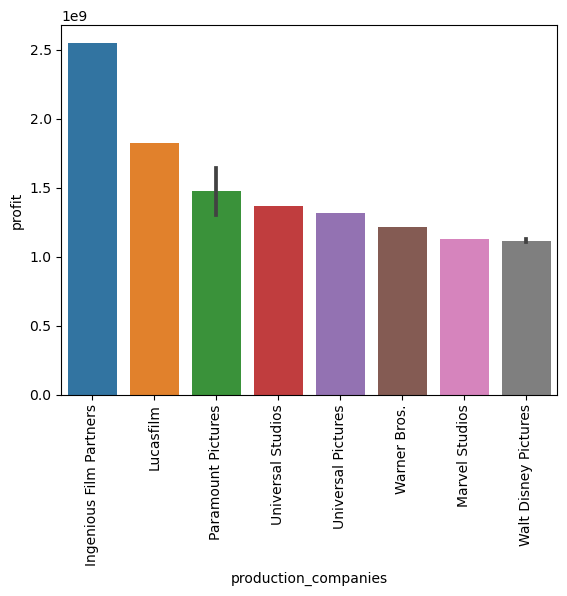

In [33]:
sns.barplot(data=df_with_profit.sort_values(by = "profit", ascending=False)[:10],
            x="production_companies", y="profit")
plt.xticks(rotation=90);

In [34]:
## Similar to the above code, we can analyze multiple other aspects of the dataset.